In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
with open("bilstm_metrics.json") as f:
    bilstm_metrics = json.load(f)

with open("bert_metrics.json") as f:
    bert_metrics = json.load(f)

bilstm_metrics, bert_metrics

({'model': 'BiLSTM + Attention',
  'accuracy': 0.9554947885705227,
  'macro_f1': 0.9327372437078179,
  'weighted_f1': 0.9565644829353847,
  'inference_time_sec': {'100_samples': 0.09813475608825684,
   '1000_samples': 0.20133113861083984,
   'full_test': 2.6231119632720947},
  'num_test_samples': 25233,
  'num_classes': 6,
  'class_labels': ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']},
 {'model': 'distilbert-base-uncased',
  'accuracy': 0.9682604169311632,
  'macro_f1': 0.9488063521788557,
  'weighted_f1': 0.9681195218086525,
  'inference_time_sec': {'full_test': 82.18600511550903},
  'num_test_samples': 39383,
  'num_classes': 6,
  'class_labels': ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']})

In [3]:
comparison_df = pd.DataFrame([
    {
        "Model": "BiLSTM + Attention",
        "Accuracy": bilstm_metrics["accuracy"],
        "Macro F1": bilstm_metrics["macro_f1"],
        "Weighted F1": bilstm_metrics["weighted_f1"],
        "Inference Time (Full Test Sec)": bilstm_metrics["inference_time_sec"]["full_test"] if "full_test" in bilstm_metrics["inference_time_sec"] else bilstm_metrics["inference_time_sec"]["full_test"]
    },
    {
        "Model": "BERT / DistilBERT",
        "Accuracy": bert_metrics["accuracy"],
        "Macro F1": bert_metrics["macro_f1"],
        "Weighted F1": bert_metrics["weighted_f1"],
        "Inference Time (Full Test Sec)": bert_metrics["inference_time_sec"]["full_test"]
    }
])

comparison_df


,Model,Accuracy,Macro F1,Weighted F1,Inference Time (Full Test Sec)
0,BiLSTM + Attention,0.955495,0.932737,0.956564,2.623112
1,BERT / DistilBERT,0.968260,0.948806,0.968120,82.186005


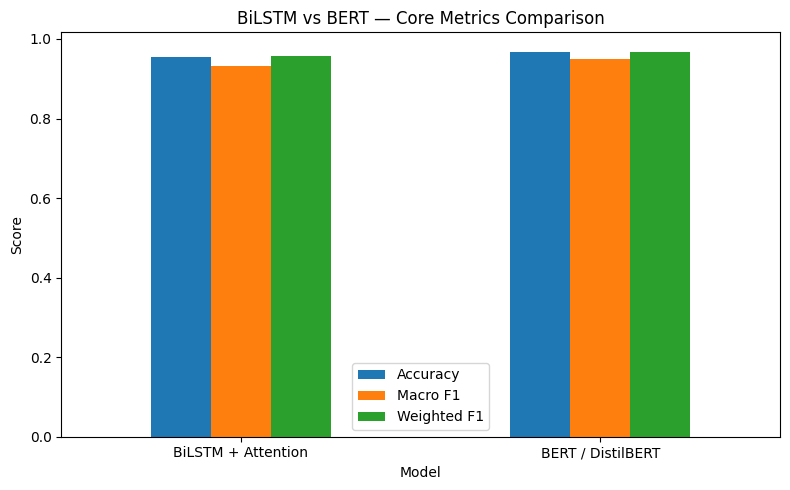

In [4]:
metrics_to_plot = ["Accuracy", "Macro F1", "Weighted F1"]
comparison_df.set_index("Model")[metrics_to_plot].plot(
    kind="bar", figsize=(8,5), rot=0, title="BiLSTM vs BERT — Core Metrics Comparison"
)
plt.ylabel("Score")
plt.tight_layout()
plt.show()


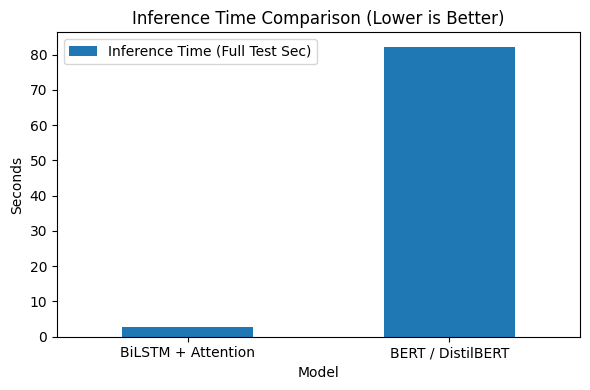

In [5]:
comparison_df.set_index("Model")[["Inference Time (Full Test Sec)"]].plot(
    kind="bar", figsize=(6,4), rot=0, title="Inference Time Comparison (Lower is Better)"
)
plt.ylabel("Seconds")
plt.tight_layout()
plt.show()


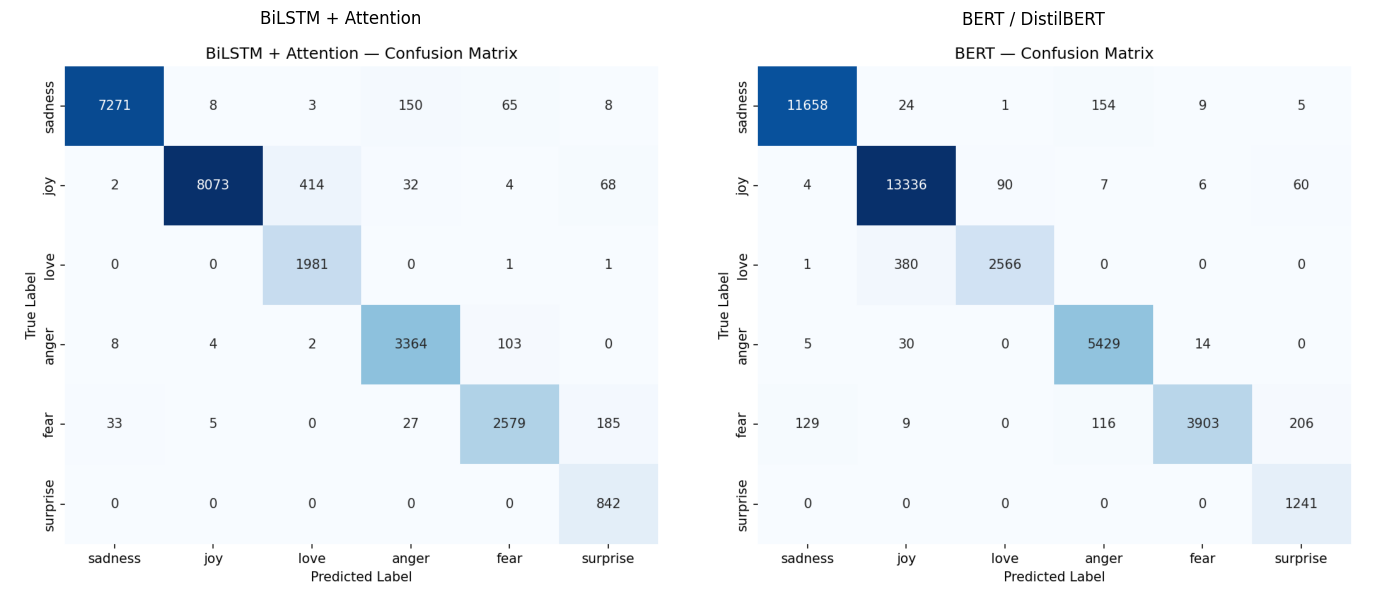

In [6]:
from PIL import Image

bilstm_img = Image.open("bilstm_confusion_matrix.png")
bert_img = Image.open("bert_confusion_matrix.png")

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.imshow(bilstm_img)
plt.axis("off")
plt.title("BiLSTM + Attention")

plt.subplot(1,2,2)
plt.imshow(bert_img)
plt.axis("off")
plt.title("BERT / DistilBERT")

plt.tight_layout()
plt.show()


In [7]:
def generate_conclusion(bilstm, bert):
    conclusion = []

    if bert["accuracy"] > bilstm["accuracy"]:
        conclusion.append("BERT achieves higher overall accuracy than BiLSTM.")
    else:
        conclusion.append("BiLSTM matches or exceeds BERT in overall accuracy.")

    if bert["macro_f1"] > bilstm["macro_f1"]:
        conclusion.append("BERT handles class imbalance better (higher Macro F1).")
    else:
        conclusion.append("BiLSTM handles class imbalance competitively.")

    if bert["inference_time_sec"]["full_test"] > bilstm["inference_time_sec"]["full_test"]:
        conclusion.append("BERT is significantly slower during inference.")
    else:
        conclusion.append("BiLSTM is slower during inference (unexpected).")

    return conclusion

auto_conclusion = generate_conclusion(bilstm_metrics, bert_metrics)

for line in auto_conclusion:
    print("•", line)


• BERT achieves higher overall accuracy than BiLSTM.
• BERT handles class imbalance better (higher Macro F1).
• BERT is significantly slower during inference.


In [8]:
comparison_df.to_csv("bilstm_vs_bert_comparison.csv", index=False)
print("✅ Comparison table saved as bilstm_vs_bert_comparison.csv")


✅ Comparison table saved as bilstm_vs_bert_comparison.csv
